In [3]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import Functions_module_beta as fn
import custom_functions_01 as cf
from custom_functions_01 import Four_list
from custom_functions_01 import avg_prob_with_confidence
from Functions_module_beta import SystemAction
from Functions_module_beta import AvgProbability

In [4]:
# for i in range(100):
    # print(avg_prob_with_confidence(custom_splitters = [0,m.pi/2,m.pi/2,m.pi/4,m.pi/2,m.pi/4], confidence= .55))

Outline Ideas - 

- optional - make the system action funciton have less calculations

- list of six splitter angles (one starting point) and a value of theta angle 

- run systemAction on it, Then find the corresponding average probability.

- Define Partial derivative functions of the avg prob with respect to the six beam splitter angles. 

- Define double derivatives of the avg prob w.r.t phi angles

- find the max avg prob using these, for this starting point

- repeat the process with more starting porints 

- append the results to a list, find beam splitter list corresponding to the maximun of that list as the optimal POVM

- repeat process for the full range of angles, append each (set of ?) POVM and the corresponding avg prob to a list

- Plot angle vs avg prob

TO DOs: 

- Need to make the avg prob with confidence fn more general, such that it works directly with input raw (or compared) four list and a given beam splitter combination, and given angle etc. (one of these is redundant).

Trial # Rough work for Gradient descent in genreral

In [5]:
import numpy as np

# Define the function to be maximized
def f(x1, x2, x3):
    return x1**2 + x2**2 + x3**2

# Define the gradient of the function
def Gradient(x1, x2, x3):
    return [2*x1, 2*x2, 2*x3]

# Define the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 100

# Initialize the variables
xx = 5
xy = 5
x3 = 5

# Perform gradient descent
for i in range(num_iterations):
    grad = Gradient(xx, xy, x3)
    signs = [i/abs(i) for i in Gradient(xx,xy,x3)]
    while xx < 30:
        xx += learning_rate * grad[0]*signs[0]
    while xy < 15:
        xy += learning_rate * grad[1]*signs[1]
    x3 += learning_rate * grad[2]*signs[2]

# Print the maximum value of the function
print("Maximum value of the function:", f(xx, xy, x3), (xx,xy,x3))

Maximum value of the function: 2440.132434467724 (30.00000000000016, 15.099999999999964, 36.223230591261675)


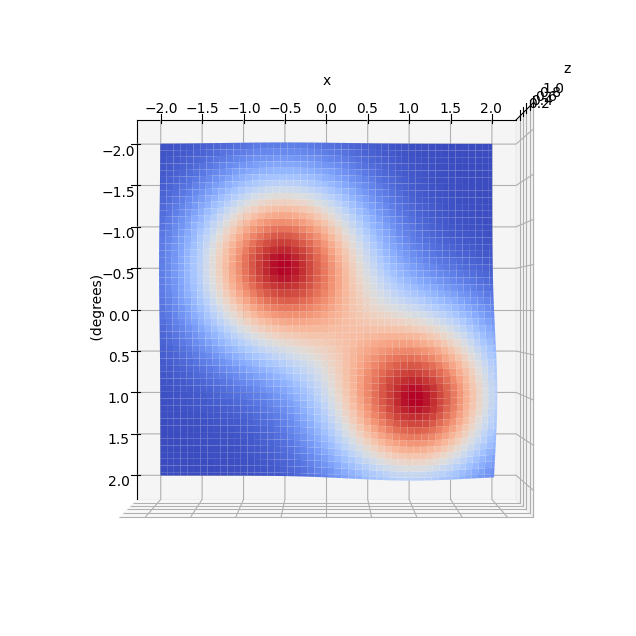

In [4]:

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
# Z = np.array([[m.exp(-(i+.5)**2) + m.exp(-j**2) + m.exp(-(i)**2- j**2)  for i in x] for j in y])
Z = np.exp(-((X+.5)**2 + (Y+.5)**2 )) + np.exp(-((X-1)**2 + (Y-1)**2 ))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z, cmap='coolwarm')     # angle, uncomment to use and comment out the concurrence one above
ax.set_xlabel(' (degrees)')

ax.set_ylabel('x')
ax.set_zlabel('z')
ax.view_init(elev = 90, azim=-0)
fig.set_size_inches(8,8)
plt.show()




def F(x,y):
    return np.exp(-((x+.5)**2 + (y+.5)**2 )) + np.exp(-((x-1)**2 + (y-1)**2 ))

def Grad_F(x,y):
    df_x = (F(x+.001,y)-F(x,y) )/.001
    df_y = (F(x,y+.001)-F(x,y) )/.001
    return [df_x,df_y]


In [57]:

def F(x,y):
    return np.exp(-((x+.5)**2 + (y+.5)**2 )) + np.exp(-((x-1)**2 + (y-1)**2 ))

def Grad_F(x,y):
    df_x = (F(x+.001,y)-F(x,y) )/.001
    df_y = (F(x,y+.001)-F(x,y) )/.001
    return [df_x,df_y]
 


# Define the learning rate and number of iterations
step = 0.01
iterations = 60
xx = -.5
xy = 1.5


def gd(starting_points = [0,0], iterations = 100 , step = .01 ):
    xx = starting_points[0]
    xy = starting_points[1]
    
    i=0
    while i < iterations:
        i+=1
        grad = Grad_F(xx,xy)
        sign = [i/abs(i) for i in grad]
        if xx < 2:
            xx += step*grad[0]*10#*sign[0]
            
        if xy < 2:
            xy += step*grad[1]*10#*sign[1]
        # if i >30 and i < 100:
        #     print(grad)
    # print(F(xx,xy), 'max value, at points', (xx,xy))
    return [F(xx,xy), [xx,xy]]
        #     print(xx,xy, '\n')

# gd([1,1])


In [ ]:
# Creating random p;oints for GD

sp = [[0,0],[0,.5],[.5,0],[.5,.5],[1,1],[1,0],[1,1.5],[1.5,1.5],[1.5,0]]

values_and_points = []

for i in sp:
    maxim = gd(i)
    values_and_points.append(maxim)


values_and_points

# most calculations above are wasted coz most of the starting points end up at the same peak.

Idea = to divide space into boxes. Run GD on each box. As soon as the point starts to go out of the box in the feature space, or as soon as it touches the box boundary, make that point disappear and assign another random point to start from, until the iterations are exhausted. This way each box is probed much more than the usual GD when many iterations are wasted coz of having either zero gradiend or coz many box points merge into the same peak. Can make this better (and much more complicated) by trackign the path of the first point until it hit the boundary and excluding a tube volume around that point for the next random point to generate at - thus less probability it will end up tracing same path again.

Main Work, for our POVM

In [5]:
# nce(confidence = 1, index_15k = False, index_729 = False ,theta = 45, four_list_compared = False, raw_four_list = False ,machine_uncertainty = .001,  priors = [.25,.25,.25,.25]):      
i=0
e = [0,sym.pi/2,sym.pi/4,0,0,0]
bee = [0,0,0,0,0,0]
x = fn.SystemAction(fn.psiminus_V,fn.psiminus_C, [0,sym.pi/2,sym.pi/4,0,0,0], 23 )     # Ex use#


print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]))    # supposed to be the final splitters
# print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2+.02,0,m.pi/4,m.pi/4,m.pi/2,0]))
# print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0+.02,m.pi/4,m.pi/4,m.pi/2,0]))
# print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4+.02,m.pi/4,m.pi/2,0]))
# print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4+.02,m.pi/2,0]))
print(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.02,0]))    # starting splitters

0.499998895236
0.37499946336199996


In [6]:
intrst = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.02,0]
print(Four_list(intrst, theta = 45 ,compared= True))

[[0.0, 0.0, 0.0, 0.014141], [0.0, 0.0, 0.707106, 0.0], [0.0, 0.0, 0.0, 0.706965], [0.0, 0.0, 0.0, 0.706965], [0.0, -0.028276, 0.706541, 0.0], [0.0, 0.0, 0.0, -0.014141], [0.5, -0.5, 0.0, 0.0], [-0.5, 0.4996, 0.019994, 0.0], [0.5, 0.5, 0.0, 0.0], [-0.5, -0.4996, -0.019994, 0.0]]


In [6]:
# defining gradient function
# priors_list = [.25,.25,.25,.25]
def Gradient(splitters, c = 1, angle_theta = 45,  delta = .001, machine_precision = .001 , priors_list = [.25,.25,.25,.25]):
    [a,b,c,d,e,f] = [i for i in splitters]

    # print([a,b,c,d,e,f],splitters)
    initial_avg_prob = avg_prob_with_confidence(confidence = c,  custom_splitters= splitters, index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)

    partial_a = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a+delta,b,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_b = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a,b+delta,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_c = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a,b,c+delta,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_d = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a,b,c,d+delta,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_e = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a,b,c,d,e+delta,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_f = (avg_prob_with_confidence(confidence = c,  custom_splitters= [a,b,c,d,e,f+delta], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta

    Gradient = [partial_a,partial_b,partial_c,partial_d,partial_e,partial_f]
    return Gradient


In [7]:
# Checking gradient function - Proof that its giving expected results, using an example. Here we are matching the function's calculation and manual calculation.
splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]
delta = .01

grad = Gradient(splitters, c = 1, angle_theta = 45, machine_precision = .0001 , priors_list = [.25,.25,.25,.25], delta = .01)

new_splitters_a = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]
new_splitters_b = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+ .01,0]  # + delta on the fifth 

important_angles = avg_prob_with_confidence(confidence= 1, custom_splitters= new_splitters_a, index_15k= False, index_729= False, theta= 45, four_list_compared= False, raw_four_list= False, machine_uncertainty= 0.001, priors = [0.25, 0.25, 0.25, 0.25])
b = avg_prob_with_confidence(confidence= 1, custom_splitters= new_splitters_b, index_15k= False, index_729= False, theta= 45, four_list_compared= False, raw_four_list= False, machine_uncertainty= 0.001, priors = [0.25, 0.25, 0.25, 0.25])

diff = b-important_angles
deriv = diff/delta

print(grad, "=full gradient")
print(diff, deriv, '= diff and deriv')

# they are the same. verified.


[-0.0049496194999998355, -0.009898994000001604, -0.0049496194999998355, -0.0049496194999998355, -0.0049601650250030715, -0.0049496194999998355] =full gradient
-4.9601650250030715e-05 -0.0049601650250030715 = diff and deriv


In [9]:
# testing gradient descent from one known poiint to verify if gives expected answers.

start_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.02,0]   # starting splitters

new_splitters = start_splitters 

iterations = 1
step = .1
print("starting splitters = ",start_splitters)
for i in range(iterations):
    [m1,m2,m3,m4,m5,m6] = [i for i in new_splitters]
    grad = Gradient(splitters = [m1,m2,m3,m4,m5,m6], c = 1, angle_theta = 45, machine_precision = .0001 , priors_list = [.25,.25,.25,.25], delta = .0001)
    new_splitters = [(new_splitters[i]+ step*grad[i]) for i in range(6)]
    
    # print(f"\n gradient = {grad}")
    # print(f"Splitter{i} = {new_splitters}")

print(f"\n Old splitters = {start_splitters} ")
print(f"\n New splitters = {new_splitters}")
print('\nAvg prob with starting splitters is ',cf.avg_prob_with_confidence(custom_splitters = start_splitters))
print('Avg prob with final new splitters is  ',cf.avg_prob_with_confidence(custom_splitters = new_splitters))
print('Optimal splitters average probability ',cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]))

b = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]    # theoretical one, supposed outcome
important_angles = new_splitters
c = [b[i]-important_angles[i] for i in range(6)]   #difference in splitter values

print(f'\ndifference in GD and optimal avg probabilites = {(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0])- cf.avg_prob_with_confidence(custom_splitters = new_splitters))}')
print(f'percent diff avg probabilites                 = {(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0])- cf.avg_prob_with_confidence(custom_splitters = new_splitters))/(cf.avg_prob_with_confidence(custom_splitters = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]))*100}')
print(f'\ndifference in GD and optimal splitters        = {c}%')

# verified. with step size .01, it works okayishly well with 25 iterations. increasing to 75 gives 1% deviation from the true answer. 


starting splitters =  [1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483, 1.5907963267948966, 0]

 Old splitters = [1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483, 1.5907963267948966, 0] 

 New splitters = [1.5697365175448708, -0.0014814172499266753, 0.7853981633974483, 0.7853981633974483, 1.5882551047949556, 0.0]

Avg prob with starting splitters is  0.37499946336199996
Avg prob with final new splitters is   0.37493447536924995
Optimal splitters average probability  0.499998895236

difference in GD and optimal avg probabilites = 0.12506441986675004
percent diff avg probabilites                 = 25.01293924013962

difference in GD and optimal splitters        = [0.0010598092500258005, 0.0014814172499266753, 0.0, 0.0, -0.017458778000059016, 0.0]%


In [4]:
# Defining double derivative funciton, based on the previously defined grad function

def Double_deriv(splitters = [0,0,0,0,0,0], c = 1, angle_theta = 45,  delta = .001, machine_precision = .001 , priors_list = [.25,.25,.25,.25]):
    [a,b,c,d,e,f] = [i for i in splitters]
    initial_grad = Gradient(splitters = splitters, c = c, angle_theta = angle_theta, delta = delta, machine_precision = machine_precision , priors_list = priors_list)

    partial_a = (Gradient(splitters =[a+delta,b,c,d,e,f] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[0]- initial_grad[0])/delta
    partial_b = (Gradient(splitters =[a,b+delta,c,d,e,f] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[1]- initial_grad[1])/delta
    partial_c = (Gradient(splitters =[a,b,c+delta,d,e,f] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[2]- initial_grad[2])/delta
    partial_d = (Gradient(splitters =[a,b,c,d+delta,e,f] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[3]- initial_grad[3])/delta
    partial_e = (Gradient(splitters =[a,b,c,d,e+delta,f] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[4]- initial_grad[4])/delta
    partial_f = (Gradient(splitters =[a,b,c,d,e,f+delta] , c = c, angle_theta = angle_theta ,  delta = delta, machine_precision = machine_precision , priors_list = priors_list)[5]- initial_grad[5])/delta

    Double_deriv = [partial_a,partial_b,partial_c,partial_d,partial_e,partial_f]
    return Double_deriv


In [19]:
# Defining Gradient search function for a given confidence and theta values.
def GDSearch(starting_point = [0,0,0,0,0,0], c_threshold = 1, theta = 45, iterations = 25, step = .01, calculations = False, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, double_deriv_method = False, random_step = False ):
    new_splitters = starting_point 
    
    for i in range(iterations):
        grad = Gradient(splitters = new_splitters, c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
        
        if random_step == True and [abs(i) < 1e-6 for i in grad]:
            index_choice = np.random.choice(6)
            new_splitters[index_choice] += -(0.1)

        if double_deriv_method == True and [abs(i) < 1e-6 for i in grad]:    # the double deriv clause
            double_deriv = Double_deriv(splitters = [m1,m2,m3,m4,m5,m6], c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
            # above gives the six double derivateives. We can use these to decide which direction to make a large move in.
            if [abs(i) < 1e-6 for i in double_deriv]:
                new_splitters = [(new_splitters[i]+ (10*step)) for i in range(6)]
            else:
                new_splitters = [(new_splitters[i]+ (10*step)*double_deriv[i]) for i in range(6)]
        
        if double_deriv_method == False and random_step == False:
            new_splitters = [(new_splitters[i]+ step*grad[i]) for i in range(6)]

# possible ways to reduce calculations  - 

        if calculations == True:        # if need to analyze, shows intermediate steps
            print(f"\n gradient = {grad}")
            if double_deriv_method == True:
                print(f"double_derivatives_list = {double_deriv}")
            print(f"Splitter_{i}= {new_splitters}")

    max_prob_splitters = new_splitters
    max_prob = avg_prob_with_confidence(custom_splitters = new_splitters, confidence= c_threshold, index_15k= False, index_729= False, theta= theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)

    if calculations == True : print('starting_point = {starting_point}')      # to compare starting and final points
    if calculations == True :  # for showing intermediate steps
        starting_prob = avg_prob_with_confidence(custom_splitters = starting_point, confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        final_prob    = avg_prob_with_confidence(custom_splitters = max_prob_splitters, confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        if final_prob != 0: 
            percent_increase = (final_prob- starting_prob)/final_prob       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        else:
            percent_increase = 'None (Division by zero)'       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        print(f"starting probability = {starting_prob}, result max probability = {final_prob}, percent increase = {percent_increase} ")

    return [max_prob, max_prob_splitters]       # the resultant maximum probability and the corresponding splitters
        

# maybe add double derivatives inside if condition- in case its already a minima point with first deriv = 0. 

In [20]:
print(f'starting point was {[m.pi,m.pi/2,m.pi/2,0,0,0]}')
GDSearch(starting_point = [m.pi,m.pi/2,m.pi/2,0,0,0], c_threshold = .95, theta = 40, iterations = 25, step = .01, calculations = True, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, random_step= False)


starting point was [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0, 0, 0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_0= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_1= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_2= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_3= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_4= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_5= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 0.0]

 gradient = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Splitter_6= [3.141592653589793, 1.5707963267948966, 1.5707963267948966, 0.0, 0.0, 

KeyboardInterrupt: 

In [5]:
#Grad search on the whole space

# creating the huge list of starting points each element of which is a list of six beam splitter angles
important_angles = [0,np.pi/2, np.pi/4]    # these when permuted among the six splitters give the huge list of starting points
#creating start points 
full_starting_point_list = []
for p in important_angles:
    for q in important_angles:
        for r in important_angles:
            for s in important_angles:
                for t in important_angles:
                    for u in important_angles:
                        full_starting_point_list.append([p,q,r,s,t,u])

# print(len(full_starting_point_list))


def Narrowing(set_of_points, c_threshold = 1, theta = 45, iterations = 25, step = .01, calculations = False, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, double_deriv_method = False, random_step = False):

    print('len of full set of points = ', len(set_of_points))


    avg_prob_list = []
    for i in set_of_points:
        avg_prob_i = avg_prob_with_confidence(confidence = c_threshold,  custom_splitters= i, index_15k= False, index_729= False, theta = theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = calc_precision, priors = priors)
        avg_prob_list.append(avg_prob_i)
        # above we made a list of avg prob, so we can eliminate the zero ones - coz most likely we wont find the optimum povm in their neighbourhood
        print(f'avg prob = ',avg_prob_i)
    
    print('len of avg prob list = ', len(avg_prob_list))
    
    non_zero_avg_prob = []
    for i in range(len(avg_prob_list)):
        if avg_prob_list[i] < 0.05:     # Check if the corresponding element in the list is equal to zero, so to delete
            set_of_points[i] = 'placeholder'        # now we have a trimmed list
            # del set_of_points[i]        # now we have a trimmed list
        else:
            non_zero_avg_prob.append((avg_prob_list[i],i))
    
    print(f'len of non zeroes = {len(non_zero_avg_prob)}', non_zero_avg_prob)    

    a = []  #temp list
    for i in set_of_points:
        if i != 'placeholder':
            a.append(i)
    set_of_points = a
    print('len of set points =',len(set_of_points), '\n', set_of_points)

    # now we have the trimmed set of starting points

    print('avg prob list = ',avg_prob_list)

    random_point_list = []      # contains elements of the form [splitters, gradient,mag]

    # for i in range(100):
    #     rand_start_point = np.random.choice(set_of_points)
    #     grad = Gradient(splitters =rand_start_point , c = c_threshold, angle_theta = theta,  delta = deriv_delta , machine_precision = calc_precision , priors_list = priors)
    #     rand_start_point_info = [ rand_start_point, grad ,sum([i**2 for i in grad])]
    #     random_point_list.append(rand_start_point_info)     # appending lists of form : [splitters, gradient,mag]

    # Now we want to narrow down the grad mod list to top ten entries
    # we will take the top ten gradient vectors
    narrowed_random_point_list = sorted(random_point_list, key=lambda x: x[2])[-10:]   # sorting according to the third elements of sublists, and taking the best 10
    # return narrowed_random_point_list
    return 5


In [36]:
#set of points is full_starting_point_list

Narrowing(full_starting_point_list, c_threshold = .95, theta = 43, iterations = 25, step = .01, calculations = False, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, double_deriv_method = False, random_step = False)


len of full set of points =  729
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0.49939096897599994
avg prob =  0
avg prob =  0
avg prob =  0.18192260261049997
avg prob =  0
avg prob =  0
avg prob =  0
avg pro

5

In [15]:
set_of_points = full_starting_point_list
# set_of_points = [[round(i,5) for i in j] for j in full_starting_point_list]
# print(set_of_points[:10])
# print(full_starting_point_list[:10])
avg_prob_list = []
c_threshold = .95
theta = 43
calc_precision = .001
priors = [.25,.25,.25,.25]

for i in set_of_points[:100]:
    avg_prob_i = avg_prob_with_confidence(confidence = c_threshold,  custom_splitters= i, index_15k= False, index_729= False, theta = theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = calc_precision, priors = priors)
    avg_prob_list.append(avg_prob_i)
    # above we made a list of avg prob, so we can eliminate the zero ones - coz most likely we wont find the optimum povm in their neighbourhood
    print(f'avg prob = ',avg_prob_i)
print((avg_prob_list))  
print(len(avg_prob_list))

avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0.49928356
avg prob =  0
avg prob =  0
avg prob =  0.181871285
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0
avg prob =  0.49928356
avg pr

In [ ]:
Part A - AimView item
Answer Key:	The aim of the Scales of the Universe Self Guided Tutorial is to study the sizes and distances to various objects in the Universe. I will also learn about AU and light years, powers of 10, and relative sizes and distances of stars and galaxies.

Part B - HypothesisView item
Answer Key:	I predicted that it will take light 5 seconds to reach Earth, 40 hours to reach Pluto, 4 months to reach the nearest star, and 250 days to reach Andromeda. Light travels really fast so for most choices, I chose the smallest number.

Part C - Methods, Observations, and DataView item
Answer Key:	I used the Travel-Time Calculator to calculate the amount of time it takes to reach various places in the Universe travelling at different speeds. I input speed in km/s and the distance to a destinaction in km. The calculator provided how long it would take to reach that distance traveling at that speed. It also converted the speed between from km/s to km/hr and percent of the speed of light. Using the tool, I found that it would take 8 mins for light to travel from the Sun to Earth, 4 hours to reach Neptune (which is close to Pluto), and 4 years to reach Alpha Centauri.

Part D - Uncertainties and Measurement ErrorView item
Answer Key:	I was not able to get the slider tool to be exactly the speed I needed it to be, but it gave me an answer close enough to chose from the options provided as answers to the Quiz Questions.

Part E - Results, Conclusions, and New LearningView item
Answer Key:	My prediction was pretty far off. The correct finding is that it takes 8 mins for light from the Sun to reach Earth, 5 hours to reach Pluto, 4 years to reach Alpha Centarui, and 2.5 million years to reach Andromeda Galaxy. While light does travel very fast, the distances between things is much larger than I thought. I learned what that an Astronomical Unit (AU) is a unit of distance used by astronomers, that alpha Centauri is the name of the nearest star to us, and that Andromeda is our nearest galaxy.

In [ ]:
Part A - Aim
(response)
I expect to learn about units of measure in space like AU and lightyears to properly understand the distance between stars planets etc. Most distances are song long they must be put into terms of the power of 10 which I also expect to see executed in the activity
(response)
The aim of the activity is to make a prediction based on how long I think it takes for light to emit from the Sun to other planets and galaxies. I'm expecting to learn about astronomical units and values, scientific notation, and distances between planets, stars, and galaxies.
(response)
The aim of the activity is to learn about light-years and astronomical units. We will also learn about and compare the distances between planets, the Sun, and other stars throughout our galaxy. I'm expecting to learn when and how to use astronomical units as well as the powers of 10 when measuring the distances between planets and stars.
(response)
The aim of this is to understand the sizes and distances involved in celestial objects. I expect to learn the distance between the planets and between the planets to the sun. Also, how long it takes the light from the sun to reach earth compared to other planets. In addition, I expect to have a better understanding about the stars and their sizes as well as the distance between them. Finally, learn more about galaxies, their sizes and the distance between them. 
(response)
The aim of the activity is to understand astronomical unit, and light year. To understand their values in Kilos. It is also to discuss the distance between earth and the sun, compared to the sun's distance and other planets. To be able to use and learn the power of 10. The ability's to Understand the distances between stars relative to the sizes of the stars. And to Understand the distances between galaxies relative to the sizes of galaxies. What I expect to learn is how far the earth is exactly from the sun, in light-years. I also expect to learn how to correctly measure using Kilos, and meters. Being able to learn about other planets, and how far the solar system is from the earth. Being able to understand and calculate AU. I am hoping to learn more about light years So t[hat I can tell the distance between planets. It is repeated throughout this short answer, but that is because I personally still have not mastered calculating the distance and doing the power of 10 to find the distance. I am hoping to learn more about the equation of the power of 10, Once I have learned how that formula works, I will be able to break down the problem of how far a planet is from another planet or solar system. Not only learning about distance but as well as learning about size. To understand the Kilometers between a place and another place. Such as, Washington D.C to Florida, etc. etc. Another thing that I expect to learn is comparing light years to other units. 
(response)

Part B - HypothesisView item
(response)
My first prediction was that light from the sun would take 8 minutes to reach earth,5 hours to reach Pluto, 4 months to reach the next star, and 2500 years to reach the Andromeda galaxy considering the great distance between some of these things and the sun and how incredibly fast light is (fastest in the universe)
(response)
I predicted that light emitted from our Sun will take 8 minutes to reach Earth, 5 days to reach Pluto, 4 months to reach the nearest star, and 250,000 years to reach the Andromeda Galaxy. To make these predictions, I thought about the distance between the Sun and these objects in the universe. 
(response)
My first predictions were that the light emitted from the Sun would take approximately 8 minutes to reach Earth, 5 hours to reach Pluto, 9 days to reach the nearest star, and 2.5 million years to reach the Andromeda galaxy. I used my prior knowledge from the reading to predict the time for Earth. For the rest of my predictions, I thought about the distance based on the order of the planets away from the Sun.
(response)
I think that the light omitted from the sun takes less time to reach the earth, compared to Pluto because the sun is closer to the earth. Then stars because they are further away from the sun comapred to planets. Finally light takes million light years to reach the galaxies. 
(response)
my first prediction is that light emitted by the sun takes 3 hours to the earth, 40 hours to reach Pluto, 17 hours to reach the nearest star, and 2,500 to reach the Andromeda Galaxy. The way I was thinking for the earth is because the earth is the farthest planet away from the sun. Making the sun's light reach us in 3 hours. I believe it takes 40 hours for Pluto because Pluto is technically not in our solar system, making it the farthest dwarf planet from the sun. I said it takes 17 hours for it to reach the nearest star because stars are the farthest away from the sun and our planets. They are farther than the earth, so It will take longer for the sun light to reach it. By knowledge I know that the earth is the farthest, from the sun as a planet. Pluto is the farthest Dwarf planet from the sun, hence why it is a "planet" full of just ice shards and stones. I know that stars are farther away from our planets, we can see it as if it was "close", but it is far. They are not close to the planets, therefor the emitted light coming from the sun takes longer to get to the stars. I say it takes 2,500 years to reach the andromeda galaxy because it is the galaxy the most farthest from the milky way.  The logic I used is that I used a picture of the solar system as a reference. From there it is was me assuming and making a prediction how far light would emit to a planet from the sun. The thinking, the knowledge and the logic, I put them together in order to make a prediction on how far the sun would emit to the planets and the stars. If the formula was given, I believe that I would be able to find the exact light years distance from the sun and the earth. I do not know how to use the formula correctly, but I am sure that it would help me determine how long it would take for the suns light to emit to the planets. 
(response)

Part C - Methods, Observations, and DataView item
The values you input into the calculator are the speed at which you are traveling and the (approximate) distance to whatever entity you are trying to reach (the moon the sun a planet etc.).The output is the expected amount of time it will take you to reach your destination given the speed you are traveling and the distance of the entity you wish to reach. The calculator makes it easy to see that to get to certain places in a timely manner very high speed requirements must be met or voyages might be multiple years long. 
(response)
I used the Travel-Time Calculator to calculate the distances between the stars and planets to our solar system. The values that are the inputs to the calculator are speed and distance, while the output is travel time. I noticed that each object already had its distance written, which made it easier to understand because I only had to input the speed/hr. I also noticed that above the km/hr was km/s, which was a more precise way of finding the travel time. 
(response)
The Travel-Time Calculator is an interesting tool used to estimate the amount of time it will take to get from Earth to any other site including the Moon, the Sun, Mars, Jupiter, Neptune, Alpha Centauri, and Sirius. The values you input are the speed, distance, and object. The tool then outputs the estimated amount of time to get to the place chosen. I noticed that the higher the speed with respect to the distance, the least amount of time it takes to get to the object chosen. I also noticed that the distances of each object are displayed next to it. This tool helped me learn that it will take about 100,000 years to get to Alpha Centauri from Earth when traveling at a speed of 14 km/s.
(response)
I used the formulas provided on the table to calculate the time it takes to reach each planet. I used the distance and divided by the speed. I noticed that it takes less time to reach planets when the speed is high compared to when the speed is low. 
(response)
In the Time-Travel Calculator the values that were “input” were the object you wanted to measure like the sun, moon, mars, jupiter etc. and at whatever distance you wanted to test out. Being able to also adjust the speed was also the input. The “output” would be the time display results like the years or months. Every answer is different.
(response)
To describe the Travel time calculator that I used to answer the quiz questions, I was using the Distance of a planet using  (kilometers), and it was measuring using the power of 10. The Travel time calculator is also measuring speed. Speed  = Distance/Time    Distance = Speed x Time   Time = Distance/Speed. These are the formulas used in order to calculate the speed, distance and how much time is a planet far from one another. This formula is also determining how long it would take to travel to planets and starts a various speeds.  Doing this formula can determine how many hours, days, months, or even years it takes for you to reach a planet at a certain amount of speed. This formula also determines and measures the speed of light, how fast light can travel to a planet to another. Observations I made during this testing, is that it is hard to determine the speed and the distance at the same time with the same formula. I also realized that distance depends on how fast or slow the speed is. 
(response)

Part D - Uncertainties and Measurement ErrorView item
The travel time calculator has specific inputs on the slider so if you want a specific speed (like 50000 kms/hr) it may not be on the slider forcing you to approximate the answer a bit based on the change you made. Luckily the approximations were enough to tell about which answers to the questions were correct. 
(response)
The Travel Time Calculator is somewhat accurate because for many of my calculations, I'd only be given very specific numbers for the speed, so I had to round the speed of the object to the nearest whole number. For example, I'd get asked to calculate the travel time if the object was going 50,000 km/hr. The input would only let me select 51.28373 km/hr. This means the measurements were not exactly accurate, but still gave me a close enough range which allowed me to choose the correct answer. 
(response)
The Travel-Time Calculator I used is not the most in determining the amount of time it will take to travel from one planet/star to another. This caused me to input numbers that were close enough to the original numbers. Although for some speeds I was not able to put in exact inputs, inputting numbers that were close enough helped me get to an answer that was close enough to what was supposed to be inputted. The measurements I made were accurate enough to answer the quiz questions.
(response)
I was only able to predict the first question right using the formula provided on the table. For the first question I got the exact output. However, I struggled finding the exact answer to the rest of the questions even though I used the same formula. For the rest of the questions I tried finding the distance between the planets then find the time. However, the measurement was not exactly the same for the rest of question, unlike the first question. 
(response)
I would say the the Travel-Time Calculator results were pretty accurate. The tutorial gave me the opportunity to know how to properly use the calculator and to get the correct answers on the quiz questions.
(response)
Describing the accuracy of the Travel time calculator I used, and how it impacted my results... It was difficult for me to find the exact speed and the exact distance measured for the problem that was given. I was not able to get the exact inputs, as I struggled to use the formula. I do not fully understand it, But it is getting somewhat easier to understand. The measurements I made were not accurate enough to answer the quiz questions, because I did not understand fully of how the formula works. I am learning KM, AU, And still learning the basic's of light years. Trying to understand how long light travels in space to one planet to another. And how long it would take to get to a planet from earth to any other planet. It depends on the speed that you go, and it would depend on the distance you go. If you go fast, then you would get to the place faster. If you go slow, then it would affect the distance and it would take longer for you to get to the place (planet).
(response)

Part E - Results, Conclusions, and New LearningView item
(response)
My prediction was light from the sun would take 8 minutes to reach earth,5 hours to reach Pluto, 4 months to reach the next star, and 2500 years to reach the Andromeda galaxy. I was wrong because I underestimated the distance in light years between the sun and things outside of the solar system and the milky way. The correct response is it would take light from the sun would take 8 minutes to reach earth,5 hours to reach Pluto, 4 years to reach the next star, and 2.5 million years to reach the Andromeda galaxy. AU: average distance between the sun and earth used to measure distances in space. Powers of Ten: used to make it easier to read large numbers used to describe the distances between space entities while also showing you how large (or how much larger) some things are in scale. 
(response)
Only one of my predictions ended up being correct, which was that it takes light 8 minutes to go from the Sun to Earth. I think I underestimated how far the objects really were from the Sun. The correct findings were that light takes about 5 hours to reach Pluto, 4 years to reach the nearest star, and 2.5 million years to reach the Andromeda galaxy. One concept I learned as part of this activity is that astronomers use the unit of distance AU to replace very large distances in kilometers. Another concept I learned is that a light year represents the amount of time it'd take for light to travel.
(response)
My predictions were mostly correct. The only two predictions that were incorrect were for how long light emitted by our Sun takes roughly to reach Pluto and to reach the nearest star. The flaw in my thinking was that I underestimated the amount of distance between the Sun and the two other objects. The correct findings are 5 days for light emitted by our Sun to reach Pluto and 4 months to reach the nearest star. Two new concepts that I learned from this activity are the conversion between kilometers and astronomical units and that there is a Travel-Time Calculator to find out the estimates between two large distances in space.
(response)
My prediction was not right because I did not think of using a calculator, however, for the first planets I compared the planets relative to which one is close to the sun. I thought the light takes less time to reach the earth than the actual time. I thought that it takes second for the light to reach the earth, hours to reach Pluto, and days to reach stars. I was very shocked that it takes years for the light to reach the stars. However my prediction was right for the estimated time it takes for light to reach the galaxies. The findings illustrated that it takes 8 minutes to reach the earth, 5 hours to reach Pluto, 4 years to reach the nearest stars, 2.5 million years to reach the Andromeda Galaxy. I learned that  the furthest star in our galaxy will be in the mercury orbit. Finally I learned about two galaxies the Milky way galaxy and the Andromeda galaxy. 
(response)
I somewhat got my prediction correct. Using the Time-Travel calculator gave me a better opportunity to better understand the questions and to actually get the right answers afterwards. Being able to see sizes and distances in astronomical objects was a new concept to me which I found interesting.
(response)
Discussing my prediction and whether it was correct or not. My prediction was incorrect. I second guess my self. At first I assumed that It would only take 8 minutes for light to emit from the sun to the earth, but then I said it would take 3-4 hours. I said 3 to 4 hours because I believed that since the earth is father away from the sun in the solar system, that it would take longer for light to travel and get to the earth. The flaw of my thinking was that I was trying to think of this as a perspective of "because this planet is farther, it would take longer for the light from the sun to emit towards the earth". I was wrong. I also had a flaw in my knowledge, I kept second guessing myself, my first choice was 8 minutes, but I ended up picking 4 hours due to earth being farther away from the sun. So I believed that the light would take longer. I had flaws in logic, I tried to put the logic of the solar system that if the planets were rotating around the orbit, around the sun, I believed that it would take longer for the sun to transmit that light towards the planet. I also had flaws when it came to using the formula, using the formula was difficult for me since math is a bit difficult as well. I do not understand the formula much besides that speed = Distance/Time       Distance = Speed X time    and that Time = distance/Speed. The correct way was that the light from the sun to reach the earth is 8 minutes. To reach Neptune it would take 4 hours. To reach the Alpha centauri, it would take 4 years. So in other words, I am not completely wrong. The farther the planet, the longer it would take for light to be emmited to the earth. 